# Plot optimal window

In [1]:
import os
import re
import sys
import json
import warnings
import matplotlib
import subprocess
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms

from math import log10, floor
from scipy.optimize import curve_fit
from scipy.stats import percentileofscore

sys.path.append('../modules')
import plot_optimal_window as plt_ow
import estimate_optimal_window as eow
import plot_temporal_fluctuation_scaling as plt_tfs
import estimate_temporal_fluctuation_scaling as etfs

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

colors = ["blue", "green", "red", "purple", "orange", "brown", "pink", "olive", "gray", "cyan"]

In [2]:
%matplotlib inline

## Global variables

In [3]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2023-04-11"

In [4]:
# Stock indexes
list_stock_indexes = {
    "^DJI" : "Dow Jones Industrial Average", # Dow Jones Industrial Average (United States)
    "^W5000" : "Wilshire 5000", # Wilshire 5000 (United States)
    "^FTSE" : "Financial Times Stock Exchange 100", # FTSE 100 (United Kingdom)
    "^IXIC" : "National Association of Securities Dealers Automated Quotation Composite", # NASDAQ Composite (United States)
    "^BVSP" : "Sao Paulo Stock Exchange" # IBOVESPA (Brazil)
}

In [5]:
# Currencies
list_currencies = {
    "GBPUSD=X" : "Currency exchange rate from U.K. pound sterling to U.S. dollar", # GBP/USD
    "CHFUSD=X" : "Currency exchange rate from swiss franc to U.S. dollar", # CHF/USD
    "EURUSD=X" : "Currency exchange rate from euro to U.S. dollar", # EUR/USD
    "SGD=X" : "Currency exchange rate from U.S. dollar to Singapore dollar", # USD/SGD
    "CAD=X" : "Currency exchange rate from U.S. dollar to Canadian dollar" # USD/CAD
}

## Load time series

In [6]:
df_stock_indexes = pd.read_csv("{}/df_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_currencies = pd.read_csv("{}/df_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_stock_indexes_parameters = pd.read_csv("{}/df_stock_index_parameters_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_currencies_parameters = pd.read_csv("{}/df_currency_parameters_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_stock_indexes_tfs_parameters = pd.read_csv("{}/df_stock_index_tfs_parameters_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_currencies_tfs_parameters = pd.read_csv("{}/df_currency_tfs_parameters_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_optimal_stock_indexes = pd.read_csv("{}/df_optimal_window_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_optimal_currencies = pd.read_csv("{}/df_optimal_window_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)

# Filtering for improvement in currency

In [7]:
df_currencies = df_currencies[
    ((df_currencies["symbol"] == "COP=X") & (df_currencies["date"] >= "2010-01-01")) | ((df_currencies["symbol"] != "COP=X"))
]

## Mean and variance evolution

We have these theoretical equations: 
$$\mu(t)=r_{x}+c_{1}t+b\ln{(1+t)}$$
$$\Upsilon(t)=c_{2}t-c_{1}b t\ln{(1+t)}-r_{x}b\ln{(1+t)}-b^{2}\ln^{2}{(1+t)}$$

In [8]:
if os.path.exists("{}/{}".format(output_path, re.sub("-", "", input_generation_date))) == False:
    os.mkdir("{}/{}".format(output_path, re.sub("-", "", input_generation_date)))
if os.path.exists("{}/{}/stock_index".format(output_path, re.sub("-", "", input_generation_date))) == False:
    os.mkdir("{}/{}/stock_index".format(output_path, re.sub("-", "", input_generation_date)))
if os.path.exists("{}/{}/currency".format(output_path, re.sub("-", "", input_generation_date))) == False:
    os.mkdir("{}/{}/currency".format(output_path, re.sub("-", "", input_generation_date)))

In [9]:
plt_ow.resume_optimal_window(
    df_optimal = df_optimal_stock_indexes,
    symbols_order = list_stock_indexes,
    precision = 2,
    rank = 2,
    output_path = "{}/{}/stock_index".format(output_path, re.sub("-", "", input_generation_date)),
    input_generation_date = input_generation_date
)[0]

,symbol,time_series,cumulant_1_mean_om_min,tfs_param_mean_om_min,drift_coefficient_0_mean_om_min,average_error_mean_om_min,Cumulant 1,TFS amplitude,Drift,MAE_p,R2
3,^BVSP,absolute log-return,-6,-3,-4,-3,$-1.01\pm0.02$,$-2.07\pm0.04$,$397.79\pm2.64$,$0.94$,$85.06\%$
4,^BVSP,log-return,-6,-3,-4,-3,$0.55\pm0.02$,$-4.46\pm0.04$,$367.36\pm2.32$,$0.52$,$84.13\%$
5,^BVSP,log-return volatility,-6,-3,-4,-3,$-239.99\pm34.63$,$433.66\pm40.84$,$2009.97\pm2481.98$,$173.20$,$86.27\%$
6,^DJI,absolute log-return,-6,-3,-4,-3,$0.07\pm0.06$,$0.84\pm0.08$,$-1.83\pm4.64$,$0.35$,$93.66\%$
7,^DJI,log-return,-6,-3,-4,-3,$-0.05\pm0.01$,$0.07\pm0.01$,$-0.17\pm0.83$,$0.07$,$58.89\%$
8,^DJI,log-return volatility,-6,-3,-4,-3,$-150.69\pm20.84$,$699.98\pm26.26$,$1202.98\pm1613.71$,$99.87$,$98.14\%$
12,^FTSE,absolute log-return,-6,-3,-4,-3,$-0.13\pm0.04$,$0.95\pm0.06$,$1.96\pm3.75$,$0.27$,$95.56\%$
13,^FTSE,log-return,-6,-3,-4,-3,$-0.06\pm0.00$,$0.08\pm0.01$,$0.30\pm0.45$,$0.04$,$89.82\%$
14,^FTSE,log-return volatility,-6,-3,-4,-3,$-115.97\pm24.04$,$712.10\pm34.82$,$1526.04\pm2189.51$,$143.08$,$97.14\%$
24,^IXIC,absolute log-return,-6,-3,-4,-3,$0.22\pm0.04$,$0.57\pm0.08$,$3.23\pm5.29$,$0.44$,$91.23\%$


In [10]:
plt_ow.resume_optimal_window(
    df_optimal = df_optimal_currencies,
    symbols_order = list_currencies,
    precision = 3,
    rank = 3,
    output_path = "{}/{}/currency".format(output_path, re.sub("-", "", input_generation_date)),
    input_generation_date = input_generation_date
)[1]

,symbol,time_series,cumulant_1_variance_om_min,cumulant_2_variance_om_min,tfs_param_variance_om_min,drift_coefficient_0_variance_om_min,average_error_variance_om_min,Cumulant 1,Cumulant 2,TFS amplitude,Drift,MAE_p,R2
9,CAD=X,absolute log-return,-3,-5,-2,0,-4,$0.010\pm0.001$,$0.014\pm0.005$,$0.144\pm0.038$,$-0.008\pm0.002$,$0.017$,$80.25\%$
10,CAD=X,log-return,-3,-5,-2,0,-4,$0.014\pm0.002$,$0.029\pm0.011$,$0.219\pm0.053$,$-0.012\pm0.002$,$0.032$,$83.26\%$
11,CAD=X,log-return volatility,-3,-5,-2,0,-4,$21.039\pm3.528$,$69534.299\pm27103.198$,$347.964\pm79.702$,$-19.957\pm3.137$,$76243.991$,$85.46\%$
12,CHFUSD=X,absolute log-return,-3,-5,-2,0,-4,$0.015\pm0.001$,$0.042\pm0.005$,$0.291\pm0.020$,$-0.015\pm0.001$,$0.017$,$92.95\%$
13,CHFUSD=X,log-return,-3,-5,-2,0,-4,$0.018\pm0.001$,$0.064\pm0.007$,$0.373\pm0.019$,$-0.020\pm0.001$,$0.023$,$94.49\%$
14,CHFUSD=X,log-return volatility,-3,-5,-2,0,-4,$4.210\pm0.304$,$3996.612\pm495.965$,$96.756\pm5.394$,$-5.419\pm0.223$,$1451.775$,$95.46\%$
24,EURUSD=X,absolute log-return,-3,-5,-2,0,-4,$0.430\pm279.144$,$0.027\pm0.031$,$0.007\pm4.566$,$0.035\pm23.370$,$0.077$,$69.05\%$
25,EURUSD=X,log-return,-3,-5,-2,0,-4,$0.027\pm0.010$,$0.046\pm0.037$,$0.190\pm0.201$,$-0.010\pm0.009$,$0.093$,$73.94\%$
26,EURUSD=X,log-return volatility,-3,-5,-2,0,-4,$5.400\pm0.995$,$2431.621\pm1824.301$,$49.244\pm37.920$,$-2.990\pm1.350$,$4554.661$,$81.45\%$
27,GBPUSD=X,absolute log-return,-3,-5,-2,0,-4,$0.008\pm0.002$,$0.012\pm0.006$,$0.153\pm0.039$,$-0.009\pm0.002$,$0.014$,$80.23\%$


Generated plot for ^DJI and time series absolute log-return
Generated plot for ^DJI and time series log-return
Generated plot for ^DJI and time series log-return volatility


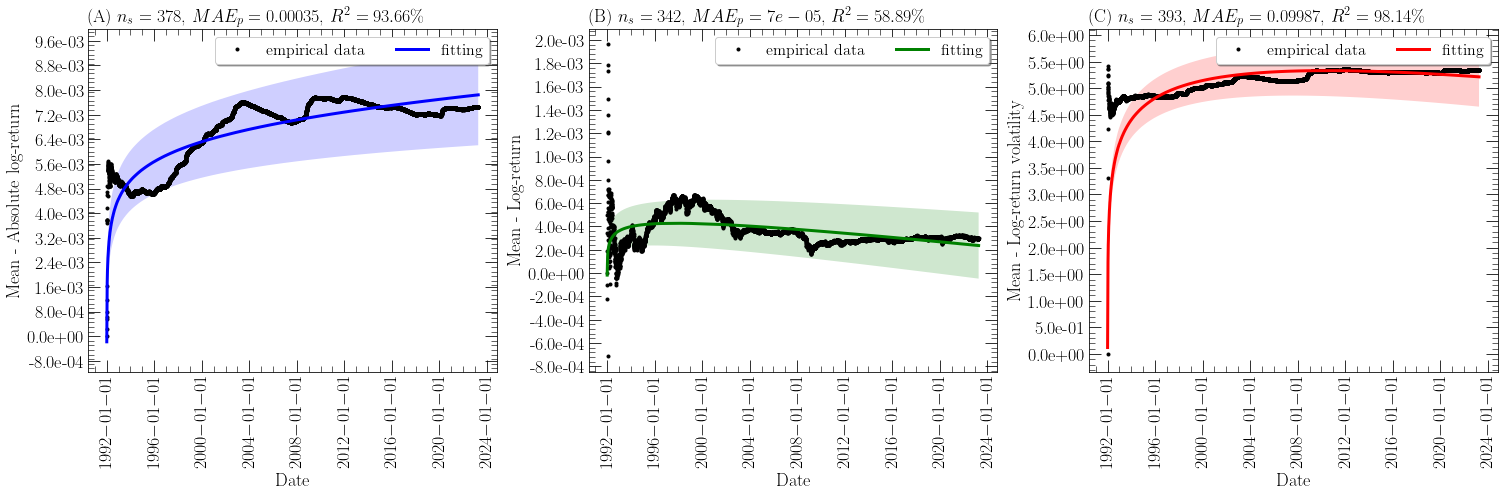

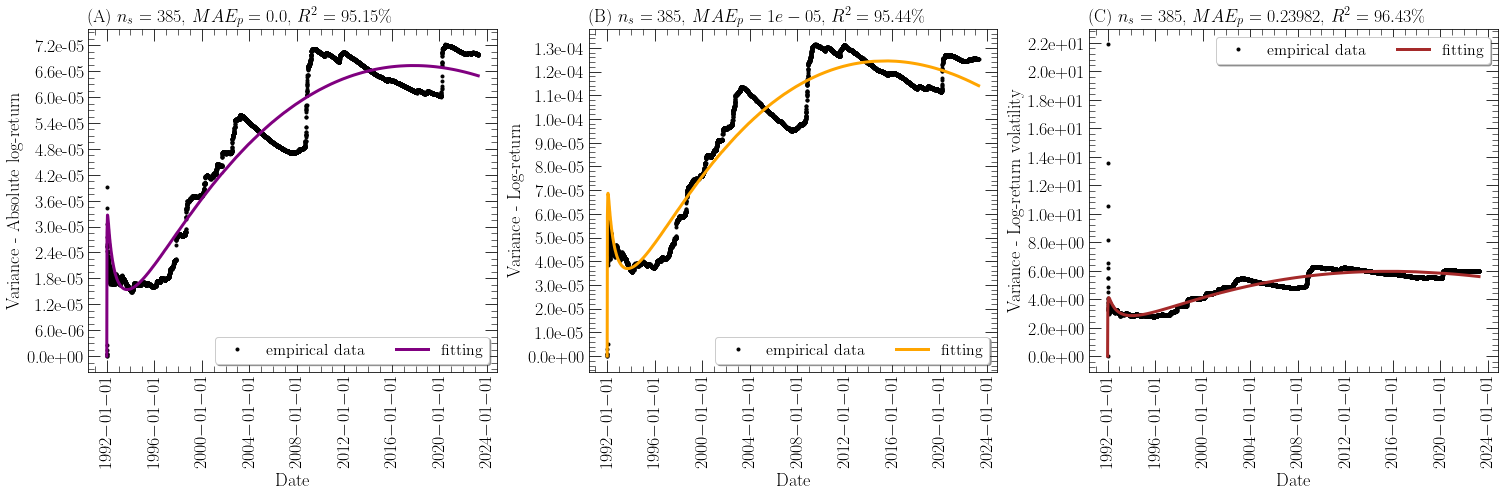

Generated plot for ^W5000 and time series absolute log-return
Generated plot for ^W5000 and time series log-return
Generated plot for ^W5000 and time series log-return volatility


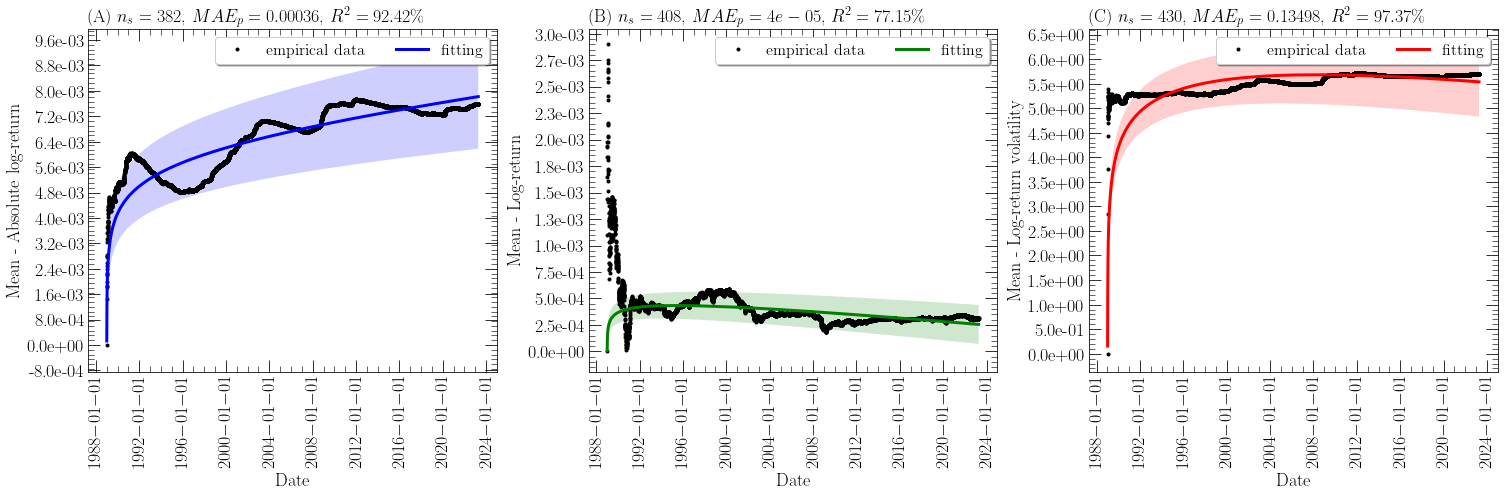

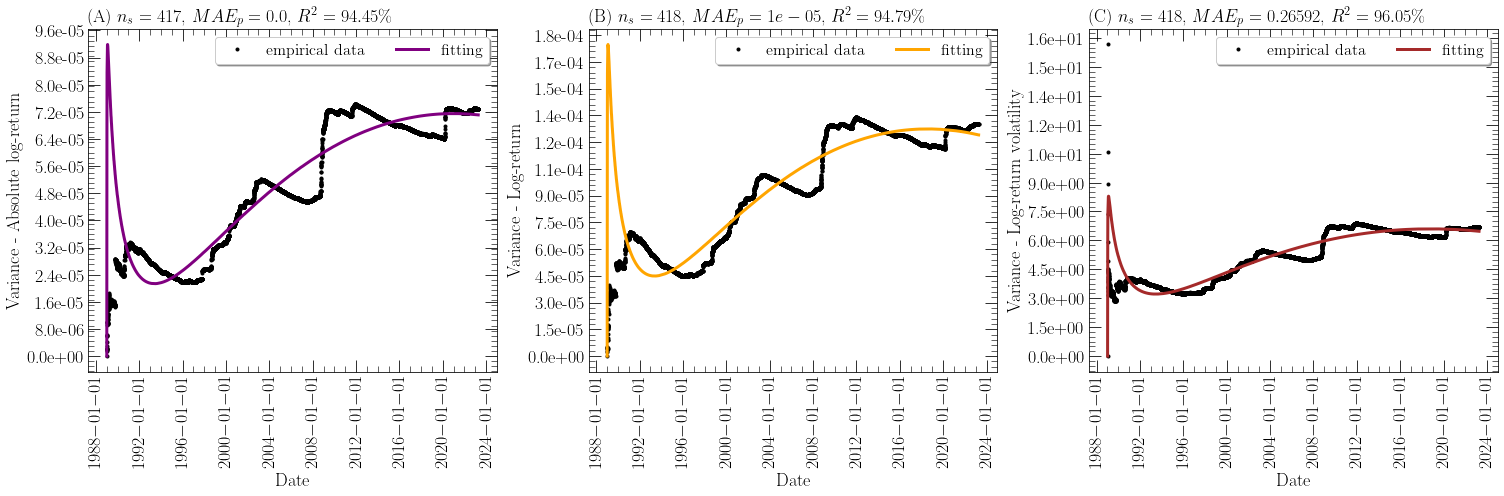

Generated plot for ^FTSE and time series absolute log-return
Generated plot for ^FTSE and time series log-return
Generated plot for ^FTSE and time series log-return volatility


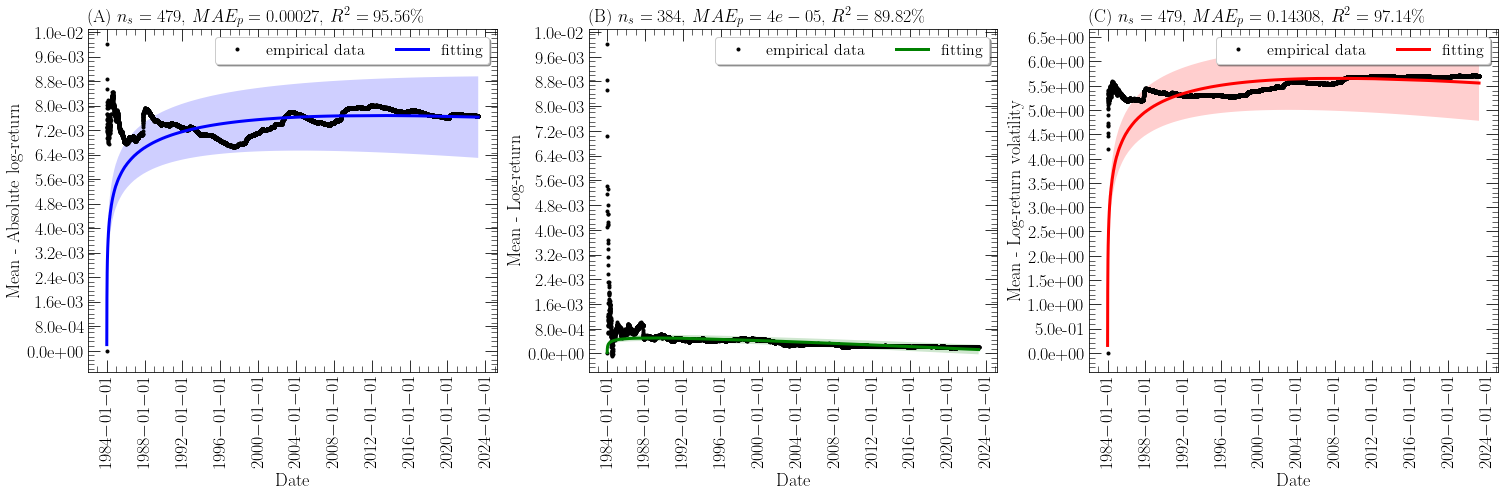

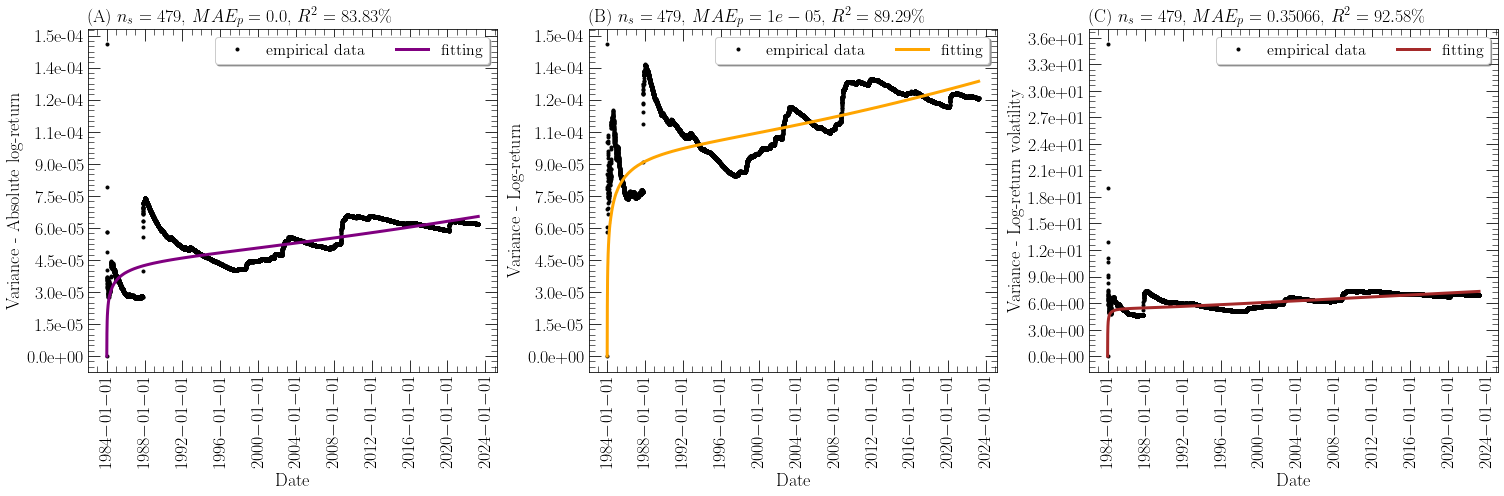

Generated plot for ^IXIC and time series absolute log-return
Generated plot for ^IXIC and time series log-return
Generated plot for ^IXIC and time series log-return volatility


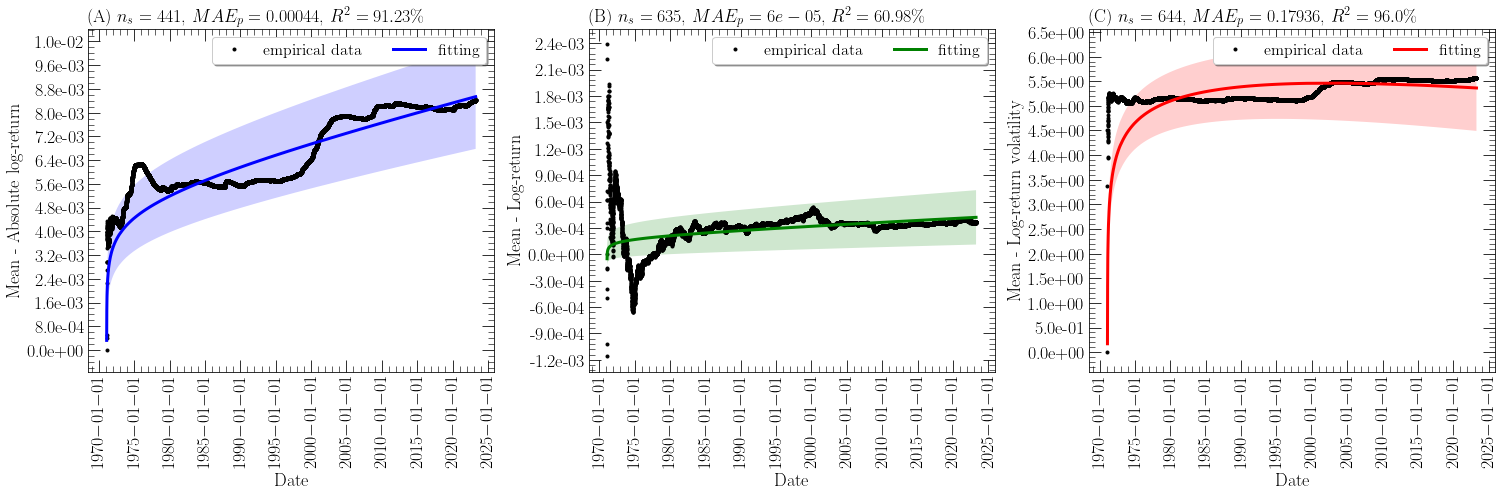

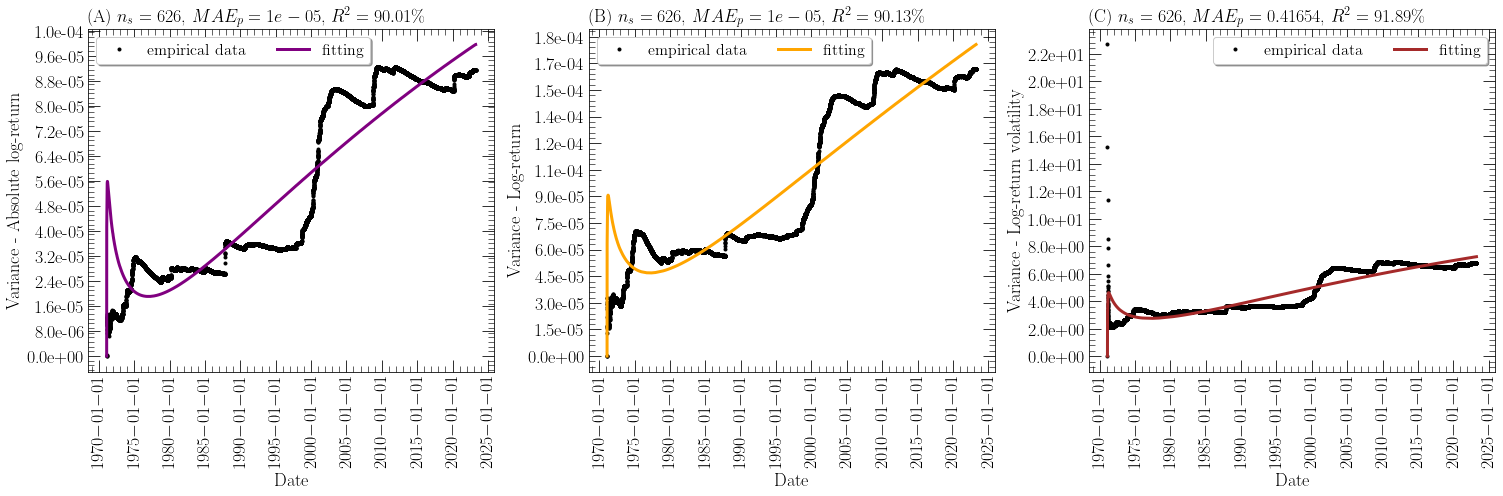

Generated plot for ^BVSP and time series absolute log-return
Generated plot for ^BVSP and time series log-return
Generated plot for ^BVSP and time series log-return volatility


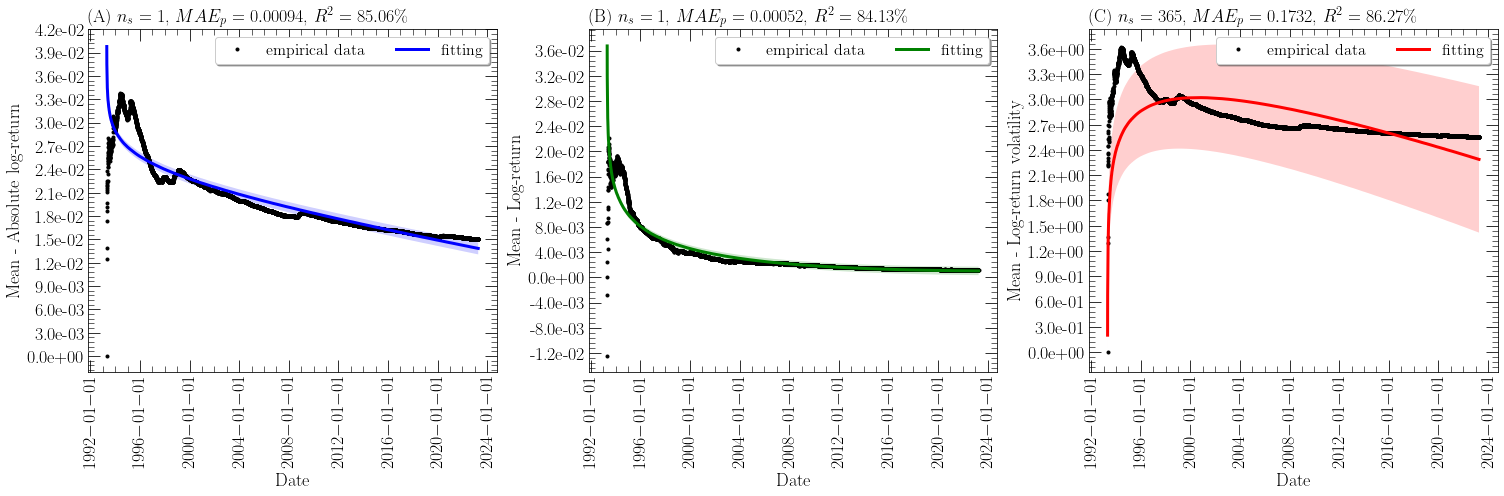

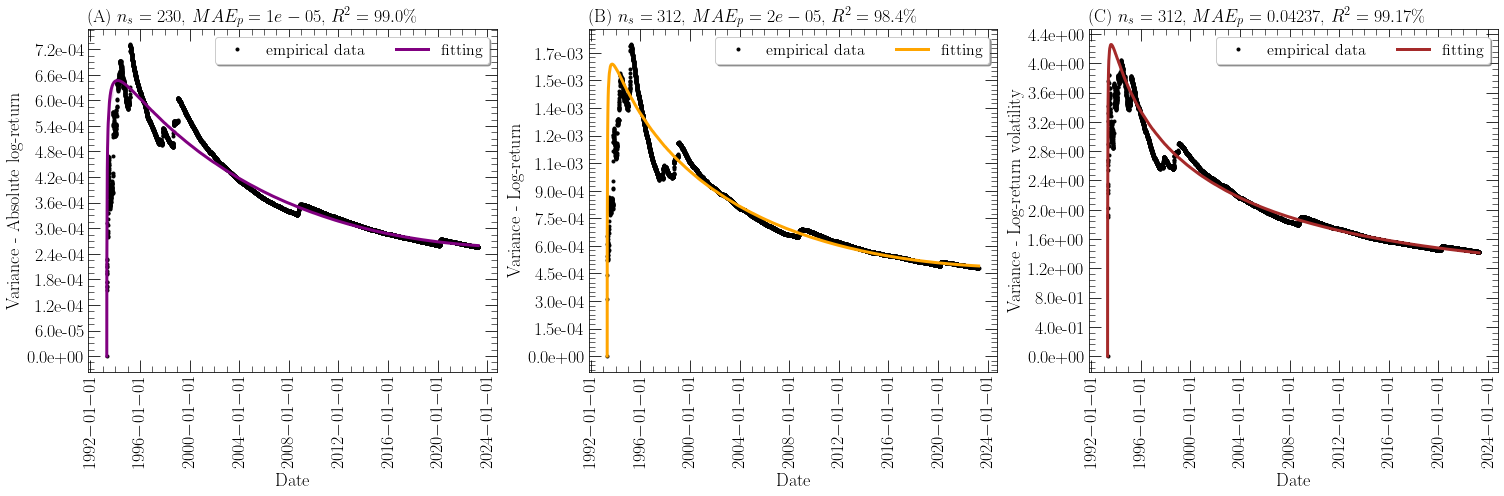

In [11]:
for ticker, ticker_name in list_stock_indexes.items():
    df_graph = plt_ow.plot_optimal_window(
        df_fts = df_stock_indexes,
        df_optimal = df_optimal_stock_indexes,
        interval = "days",
        symbols = [ticker],
        width = 21,
        height = 7,
        all_data = True,
        markersize = 3,
        fontsize_labels = 18,
        fontsize_legend = 16,
        usetex = True,
        n_cols = 4,
        n_x_breaks = 15,
        n_y_breaks = 15,
        fancy_legend = True,
        dpi = 300,
        save_figures = True,
        output_path = "{}/{}/stock_index".format(output_path, re.sub("-", "", input_generation_date)),
        information_name = re.sub("(\^)|(=X)", "", ticker),
        input_generation_date = input_generation_date
    )

Generated plot for GBPUSD=X and time series absolute log-return
Generated plot for GBPUSD=X and time series log-return
Generated plot for GBPUSD=X and time series log-return volatility


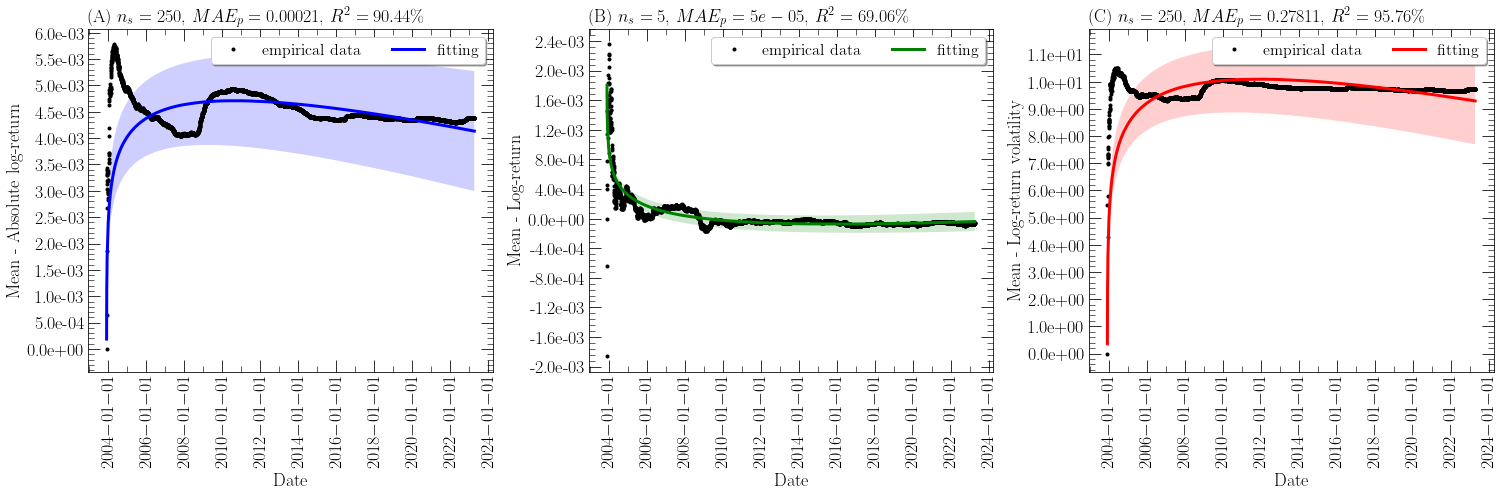

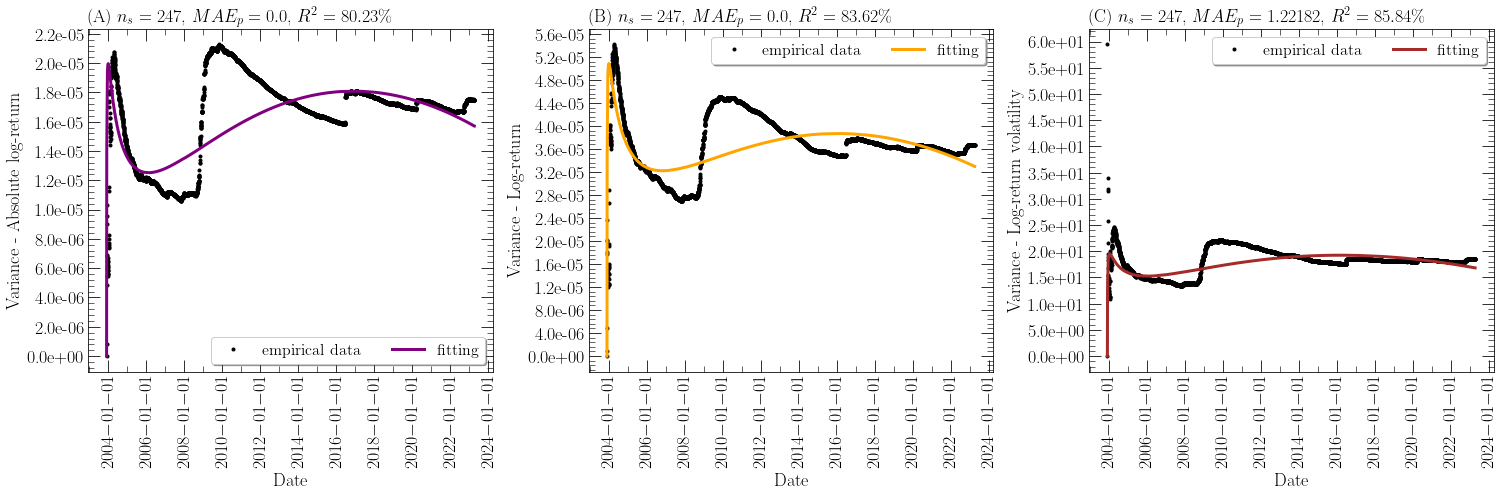

Generated plot for CHFUSD=X and time series absolute log-return
Generated plot for CHFUSD=X and time series log-return
Generated plot for CHFUSD=X and time series log-return volatility


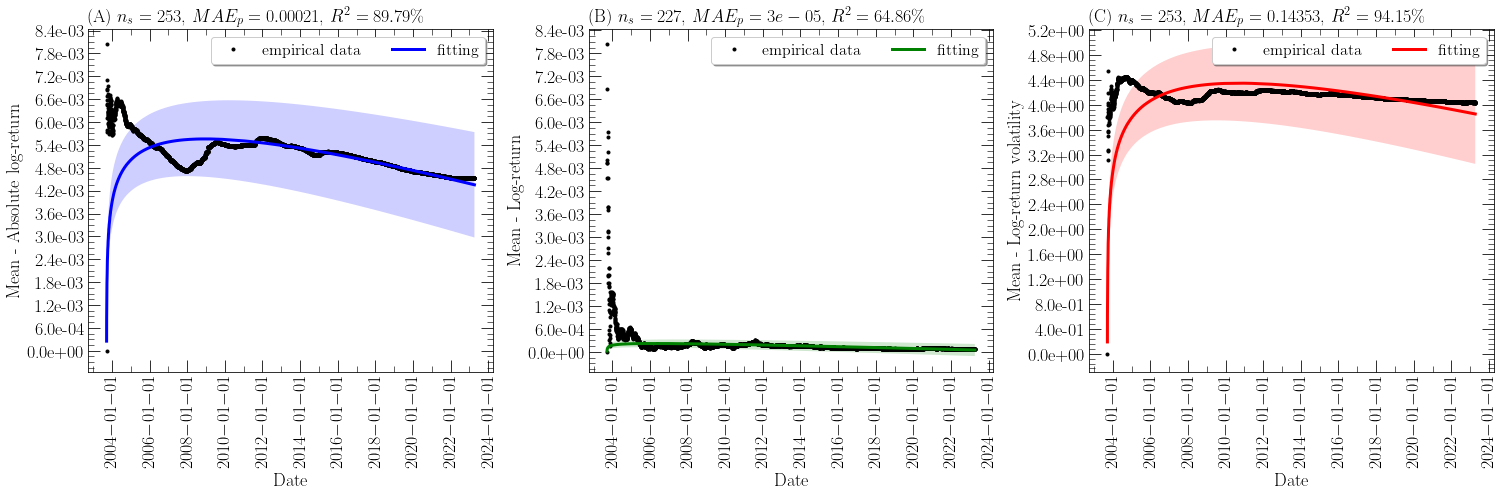

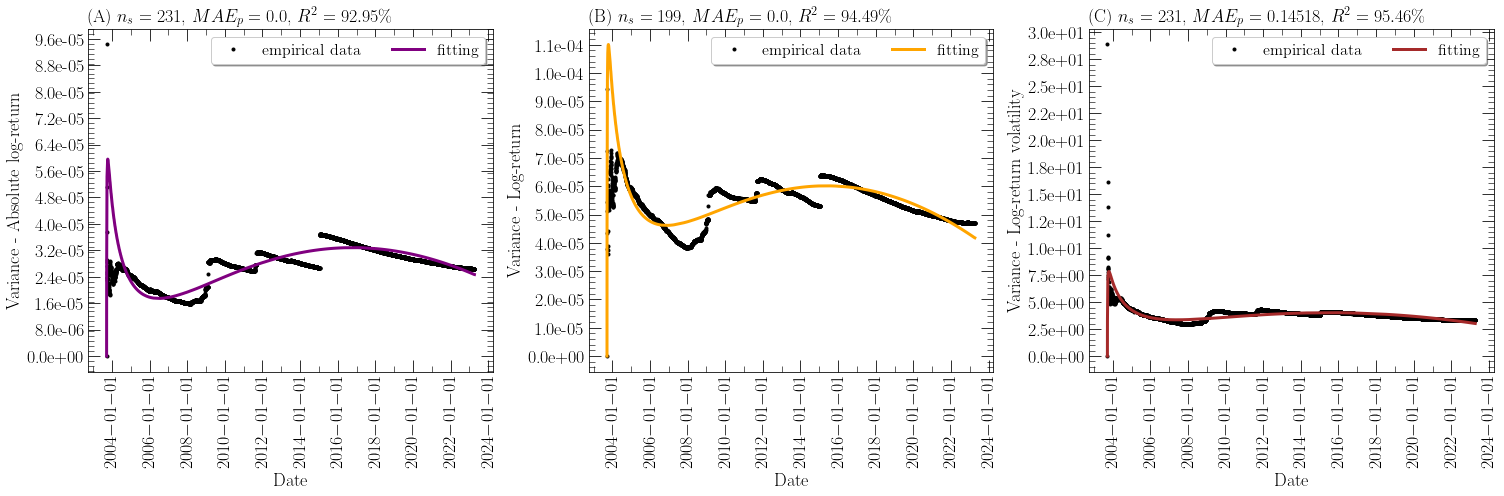

Generated plot for EURUSD=X and time series absolute log-return
Generated plot for EURUSD=X and time series log-return
Generated plot for EURUSD=X and time series log-return volatility


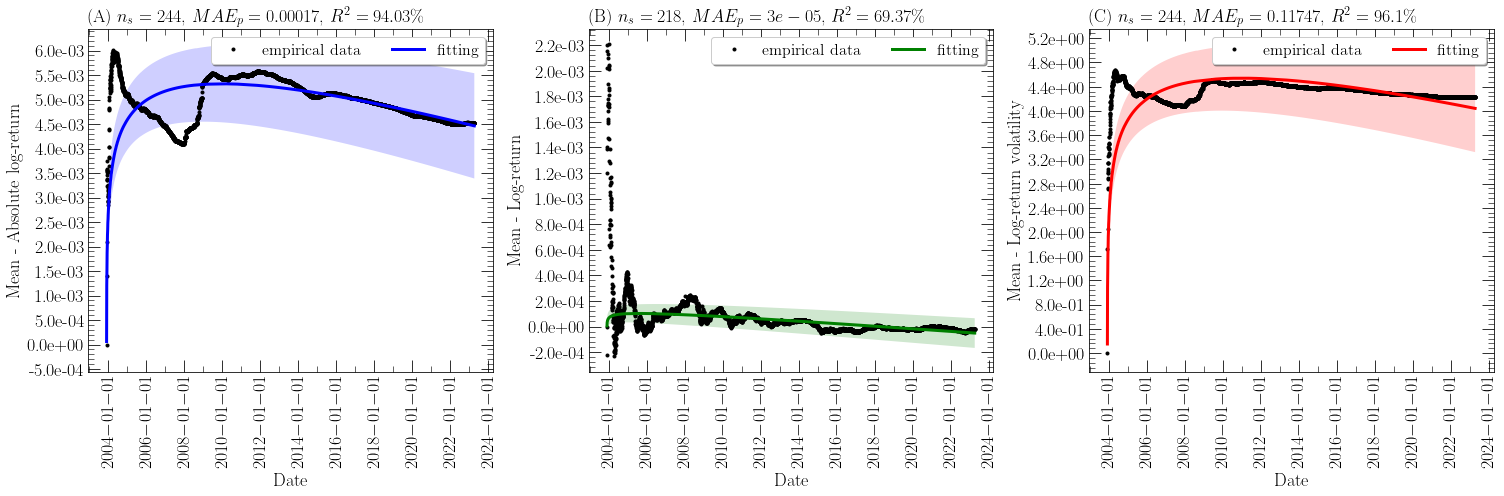

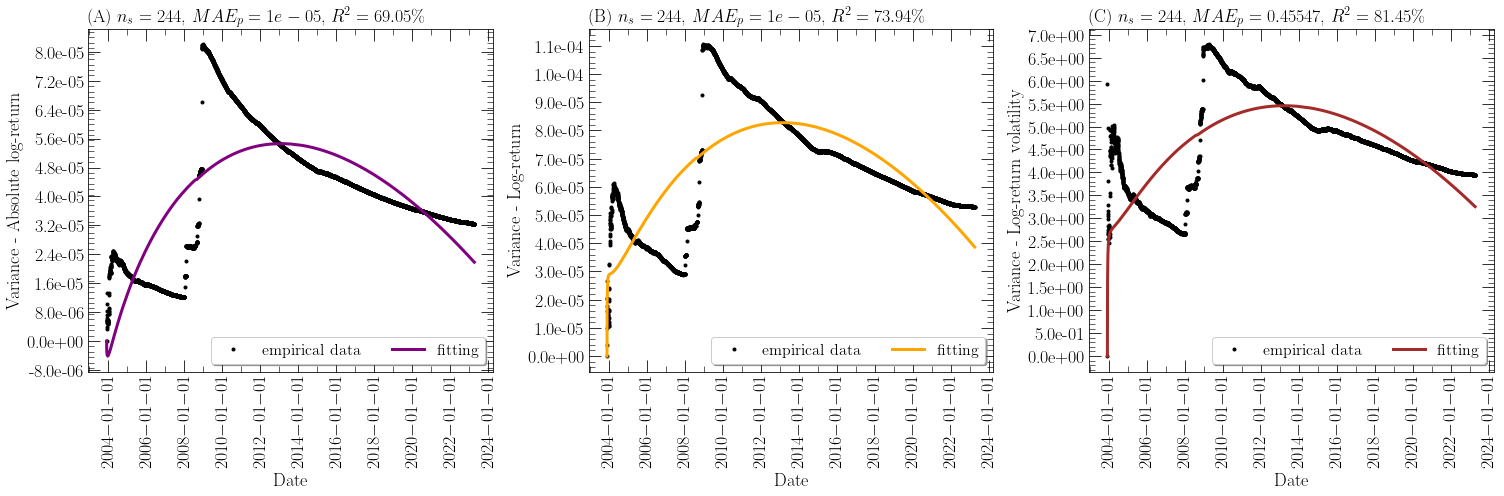

Generated plot for SGD=X and time series absolute log-return
Generated plot for SGD=X and time series log-return
Generated plot for SGD=X and time series log-return volatility


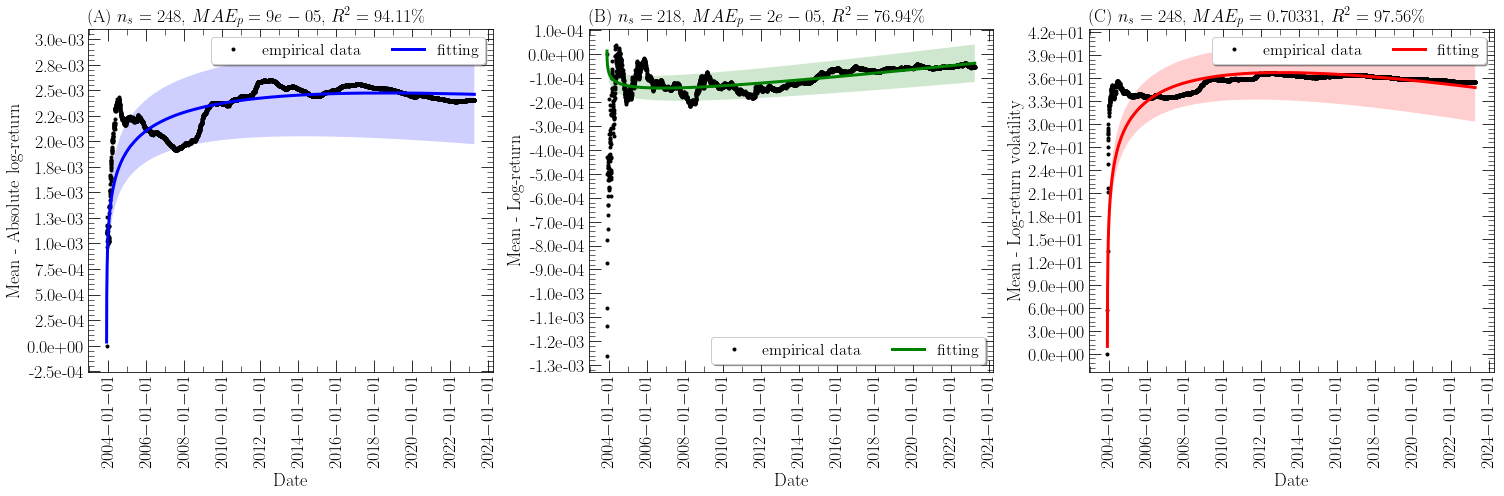

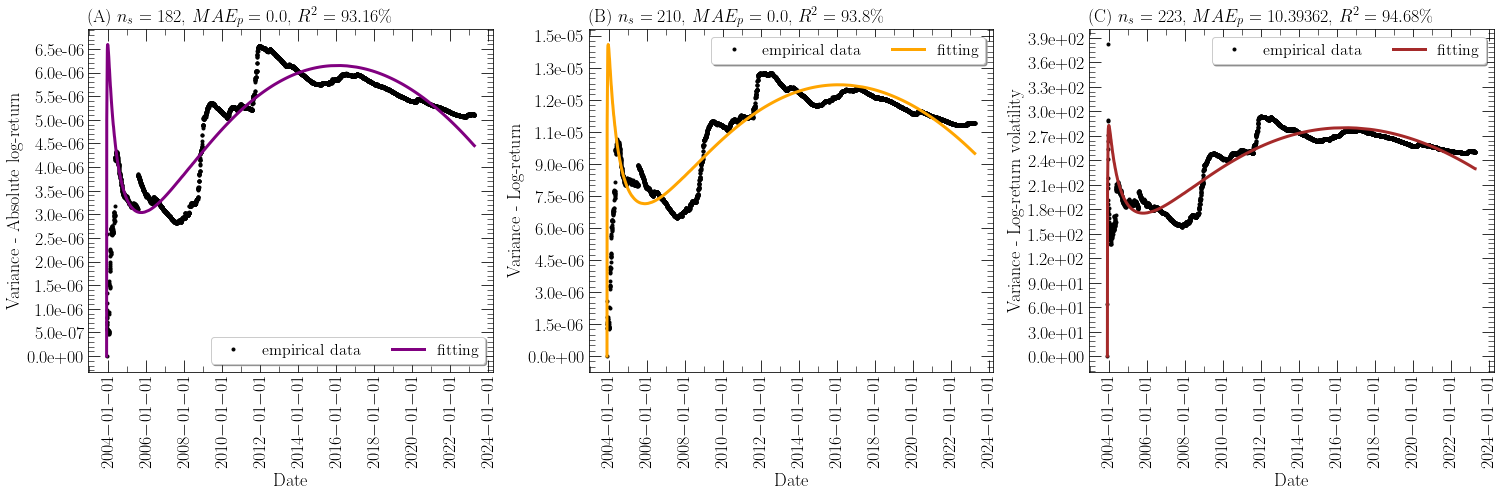

Generated plot for CAD=X and time series absolute log-return
Generated plot for CAD=X and time series log-return
Generated plot for CAD=X and time series log-return volatility


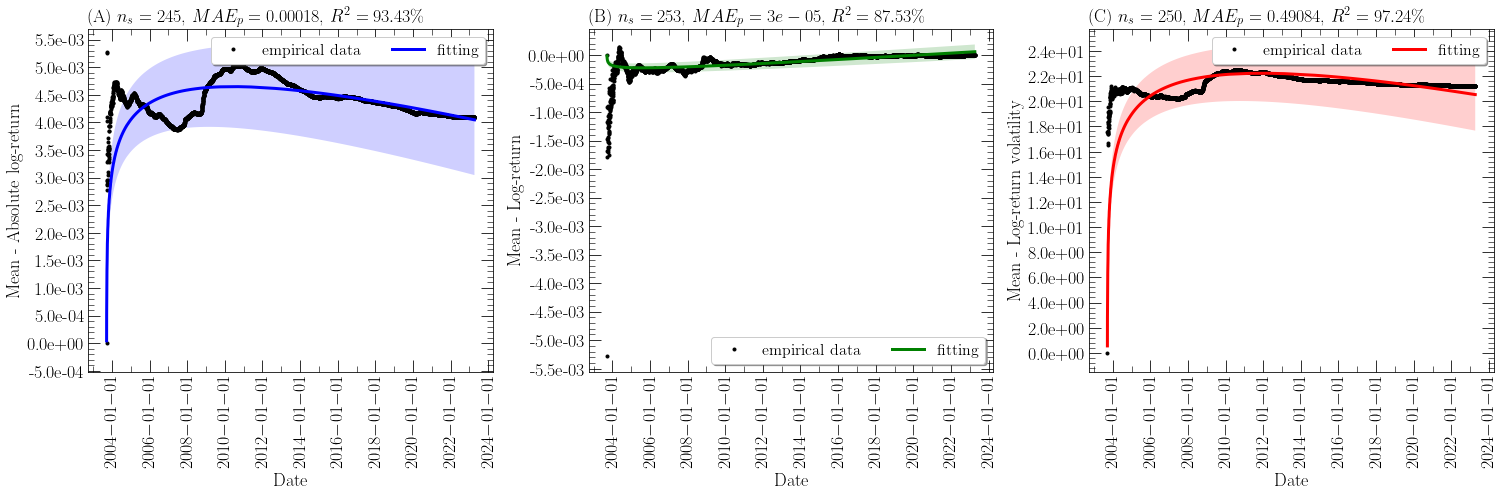

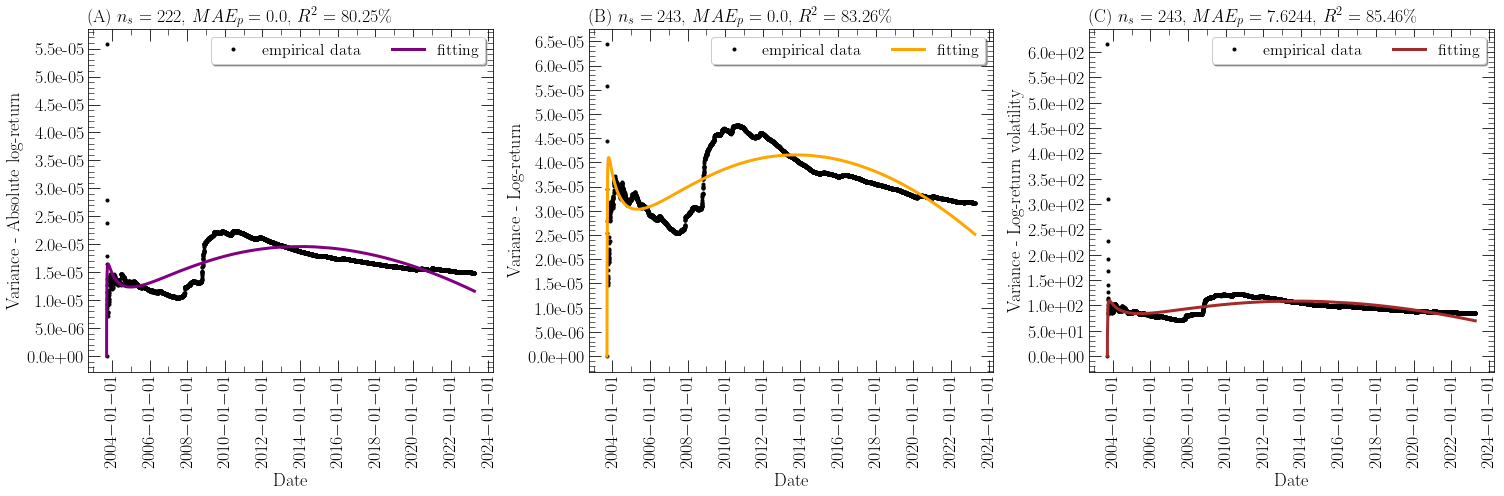

In [12]:
for ticker, ticker_name in list_currencies.items():
    df_graph = plt_ow.plot_optimal_window(
        df_fts = df_currencies,
        df_optimal = df_optimal_currencies,
        interval = "days",
        symbols = [ticker],
        width = 21,
        height = 7,
        all_data = True,
        markersize = 3,
        fontsize_labels = 18,
        fontsize_legend = 16,
        usetex = True,
        n_cols = 4,
        n_x_breaks = 15,
        n_y_breaks = 15,
        fancy_legend = True,
        dpi = 300,
        save_figures = True,
        output_path = "{}/{}/currency".format(output_path, re.sub("-", "", input_generation_date)),
        information_name = re.sub("(\^)|(=X)", "", ticker),
        input_generation_date = input_generation_date
    )

Generated plot for ^DJI and time series absolute log-return
Generated plot for ^DJI and time series log-return volatility


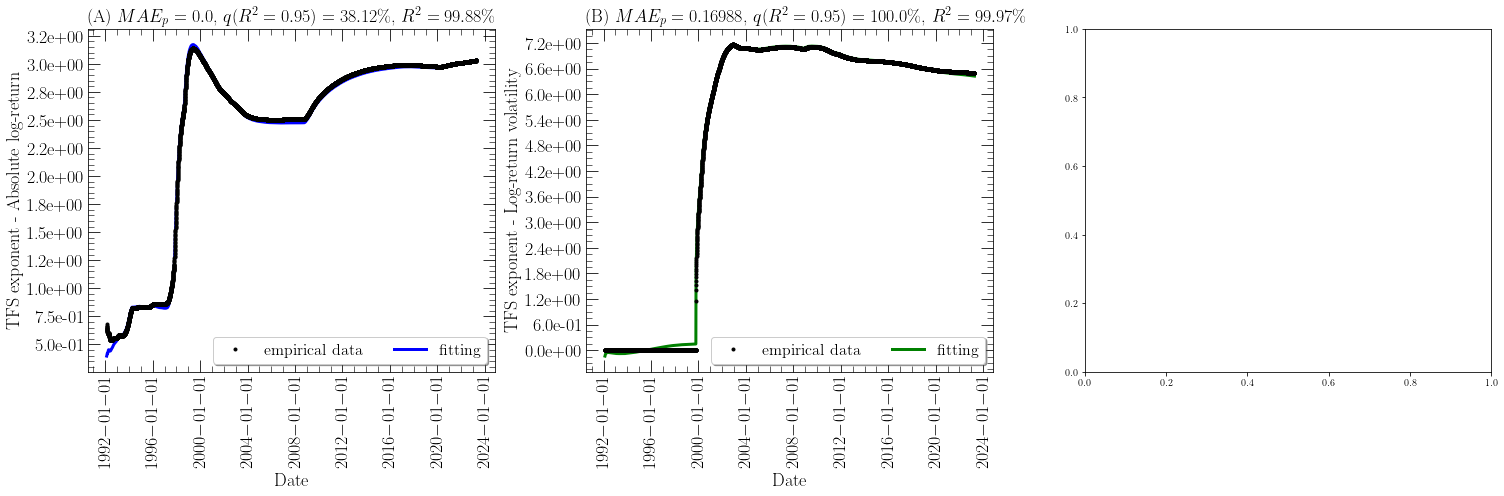

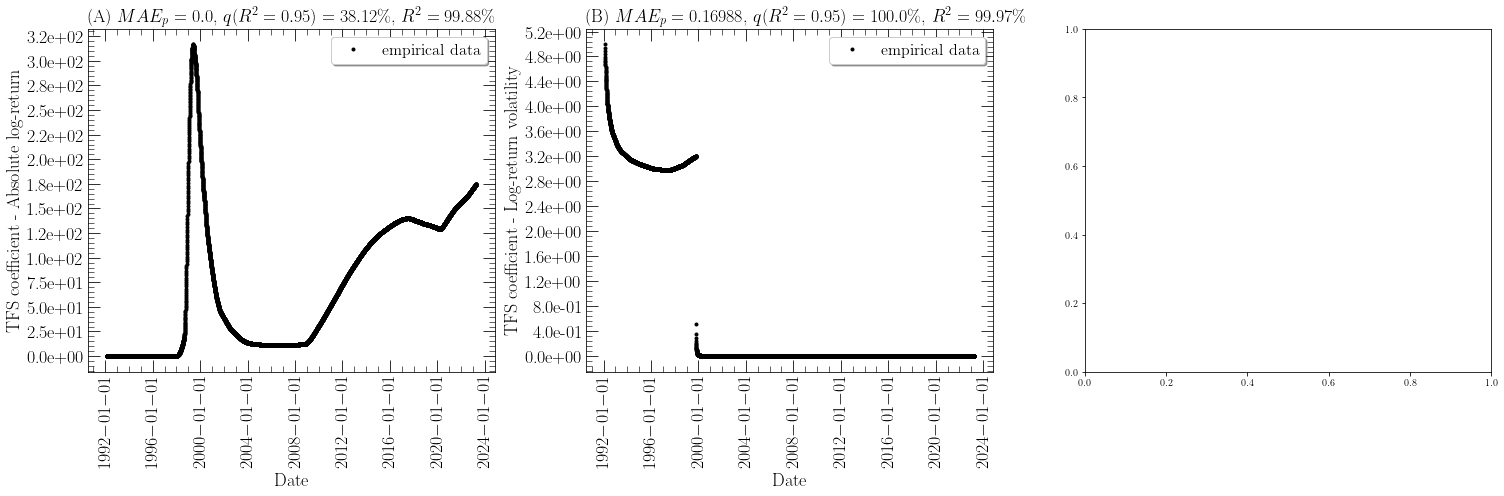

Generated plot for ^W5000 and time series absolute log-return
Generated plot for ^W5000 and time series log-return
Generated plot for ^W5000 and time series log-return volatility


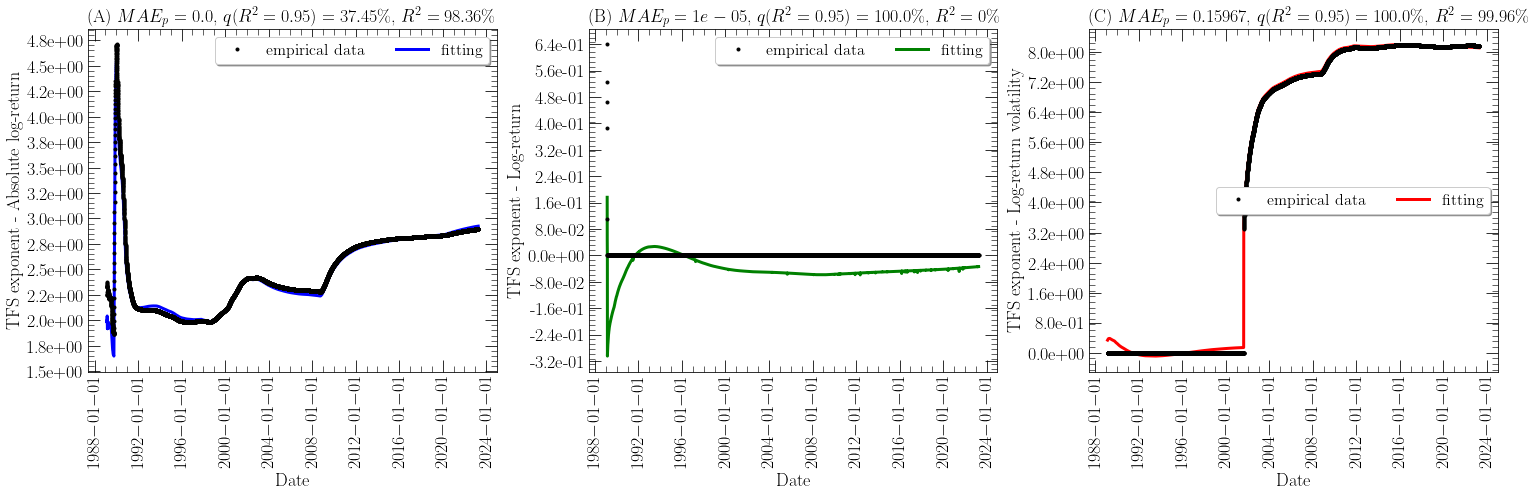

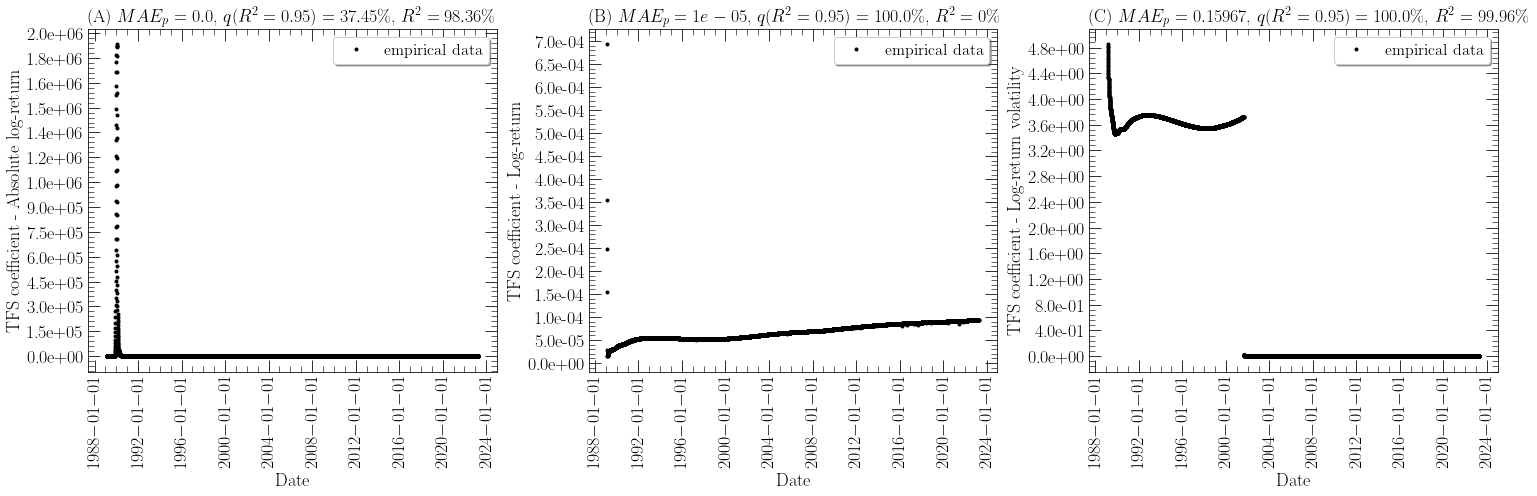

Generated plot for ^FTSE and time series absolute log-return
Generated plot for ^FTSE and time series log-return
Generated plot for ^FTSE and time series log-return volatility


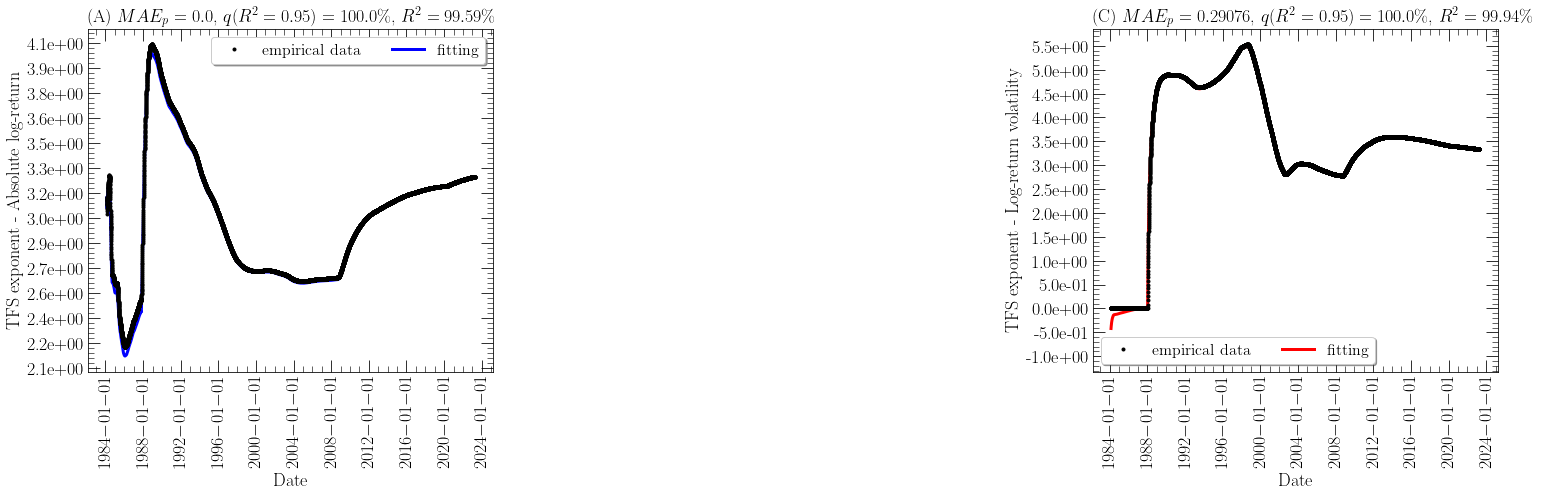

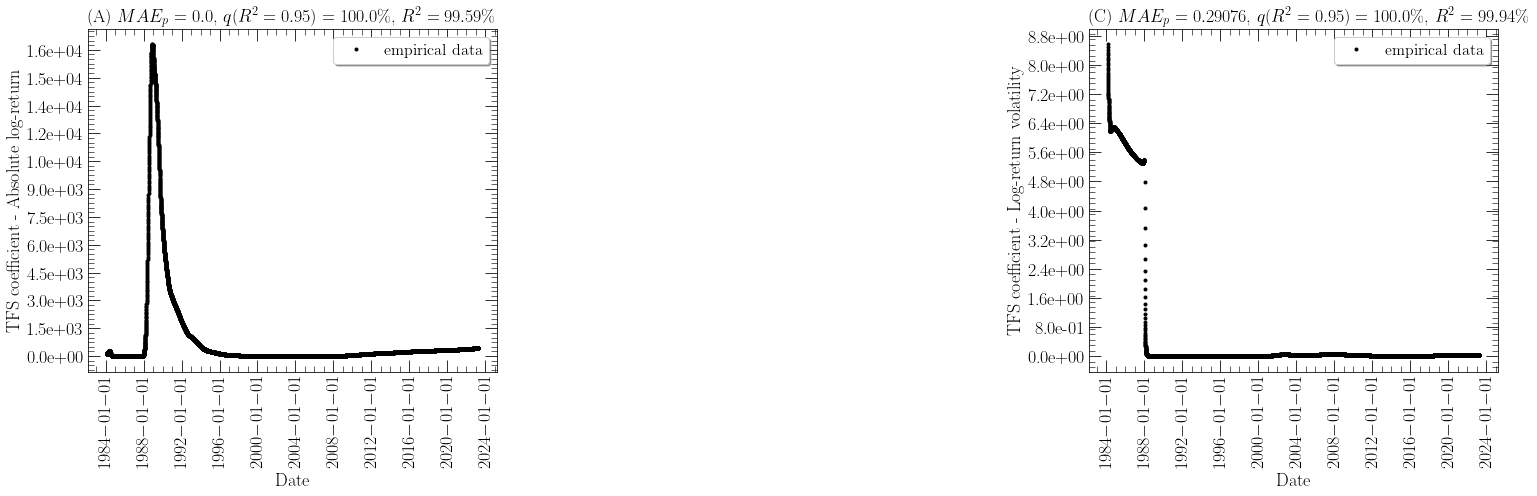

Generated plot for ^IXIC and time series absolute log-return
Generated plot for ^IXIC and time series log-return
Generated plot for ^IXIC and time series log-return volatility


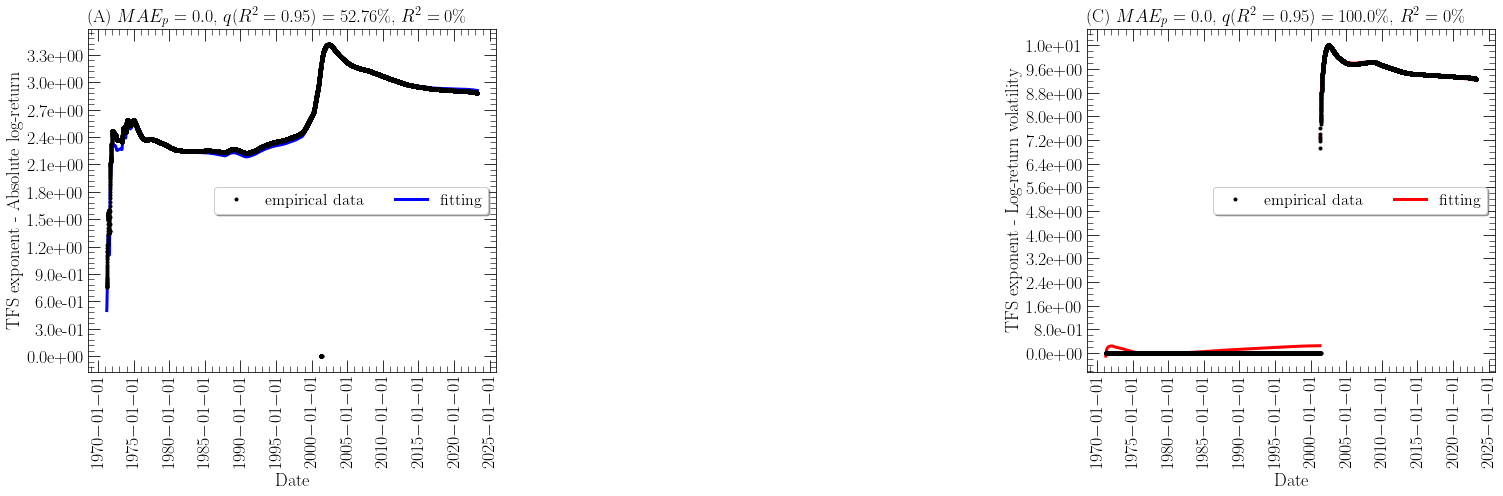

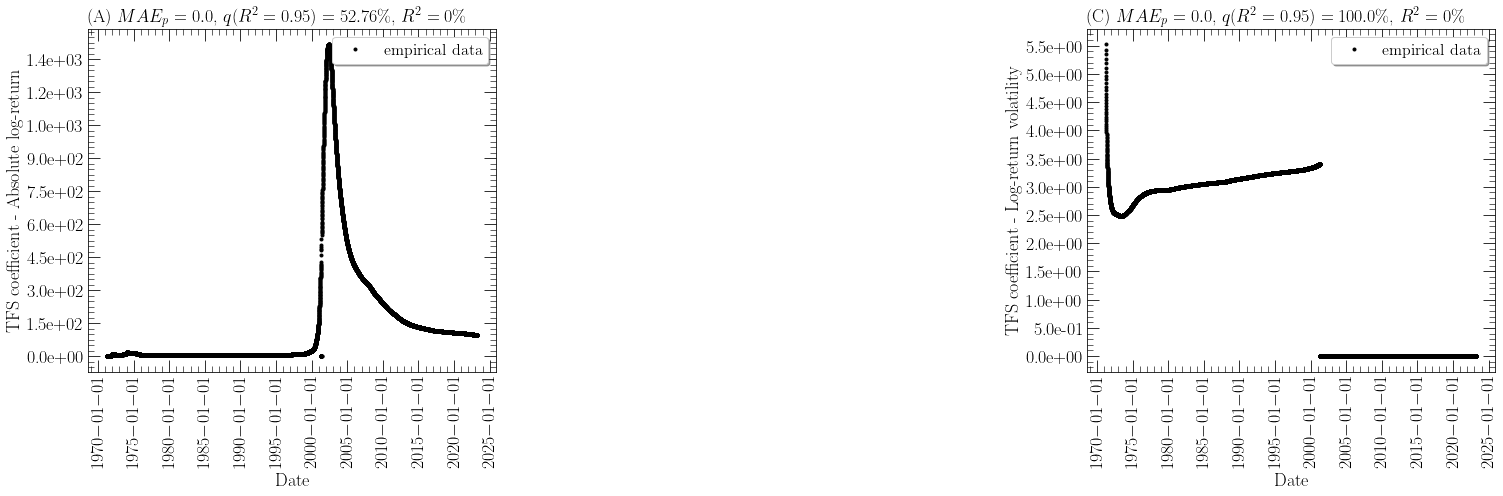

Generated plot for ^BVSP and time series absolute log-return
Generated plot for ^BVSP and time series log-return volatility


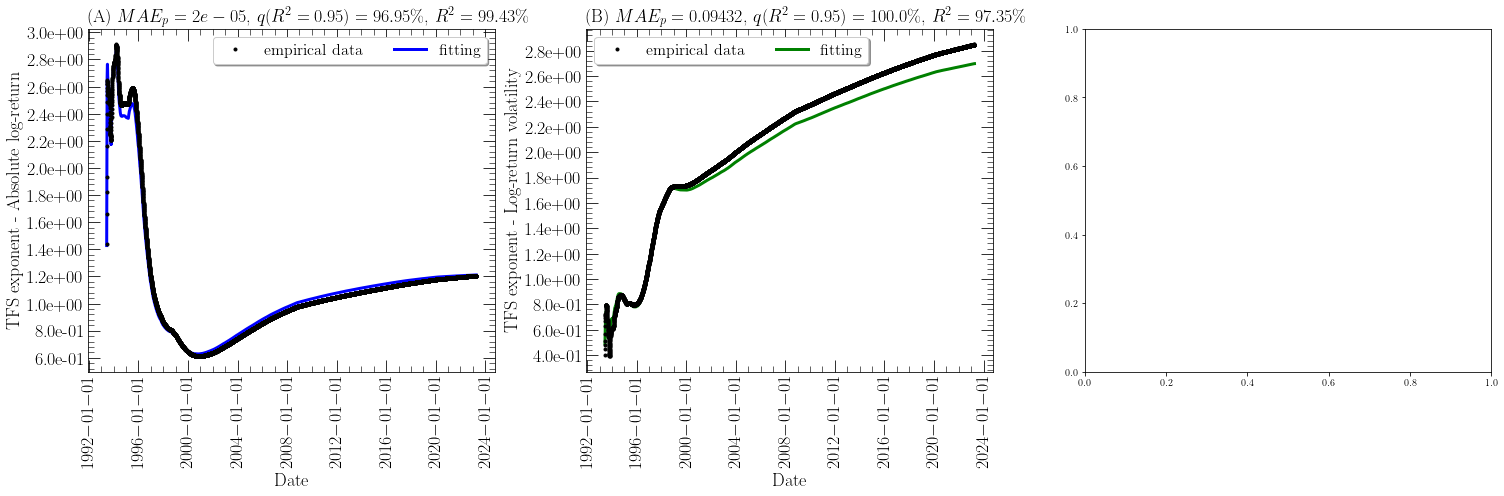

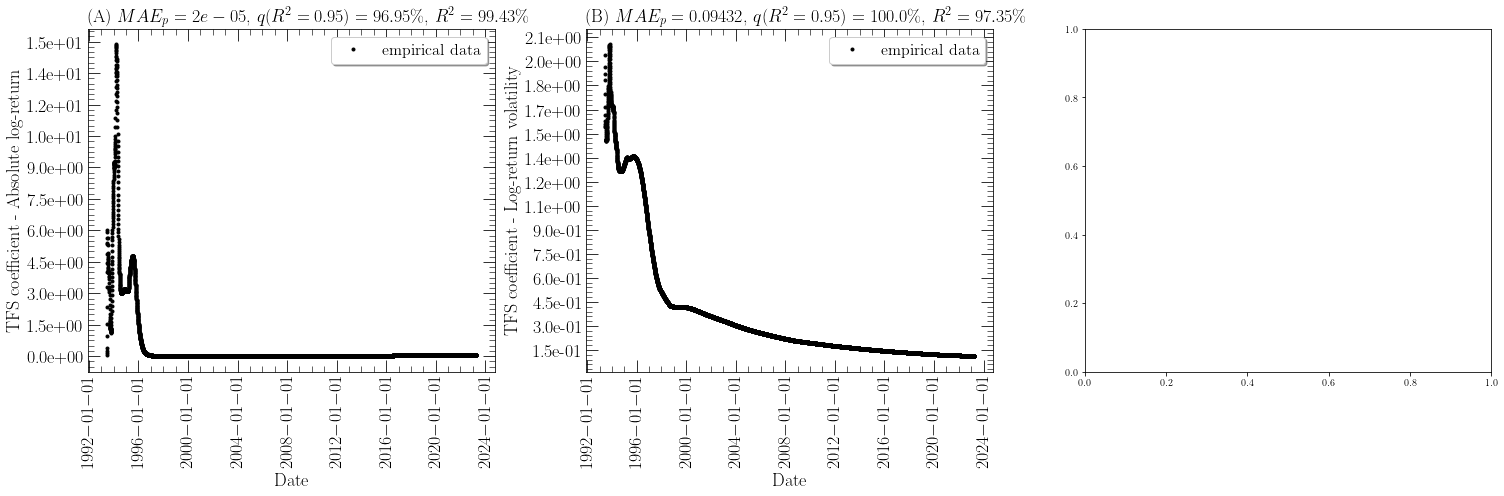

In [13]:
for ticker, ticker_name in list_stock_indexes.items():
    df_graph = plt_tfs.plot_tfs_evolution(
        df_fts = df_stock_indexes,
        df_optimal = df_optimal_stock_indexes,
        df_tfs = df_stock_indexes_tfs_parameters,
        interval = "days",
        threshold = 0.95,
        symbols = [ticker],
        width = 21,
        height = 7,
        all_data = True,
        markersize = 3,
        fontsize_labels = 18,
        fontsize_legend = 16,
        usetex = True,
        n_cols = 4,
        n_x_breaks = 15,
        n_y_breaks = 15,
        fancy_legend = True,
        dpi = 300,
        save_figures = True,
        output_path = "{}/{}/stock_index".format(output_path, re.sub("-", "", input_generation_date)),
        information_name = re.sub("(\^)|(=X)", "", ticker),
        input_generation_date = input_generation_date
    )

Generated plot for GBPUSD=X and time series absolute log-return
Generated plot for GBPUSD=X and time series log-return volatility


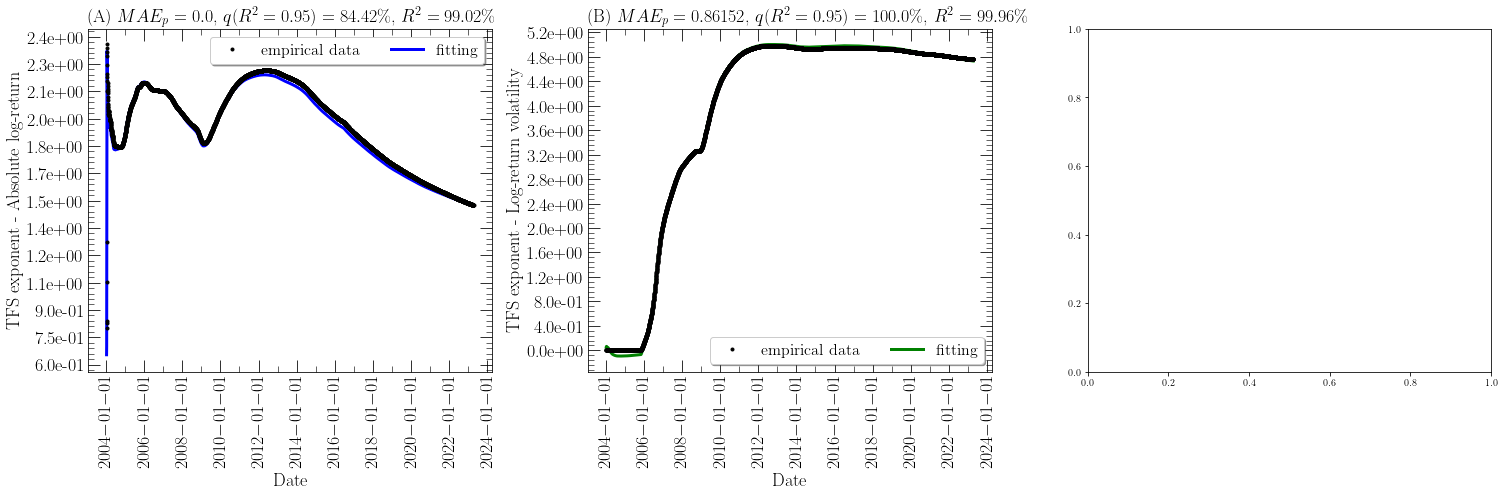

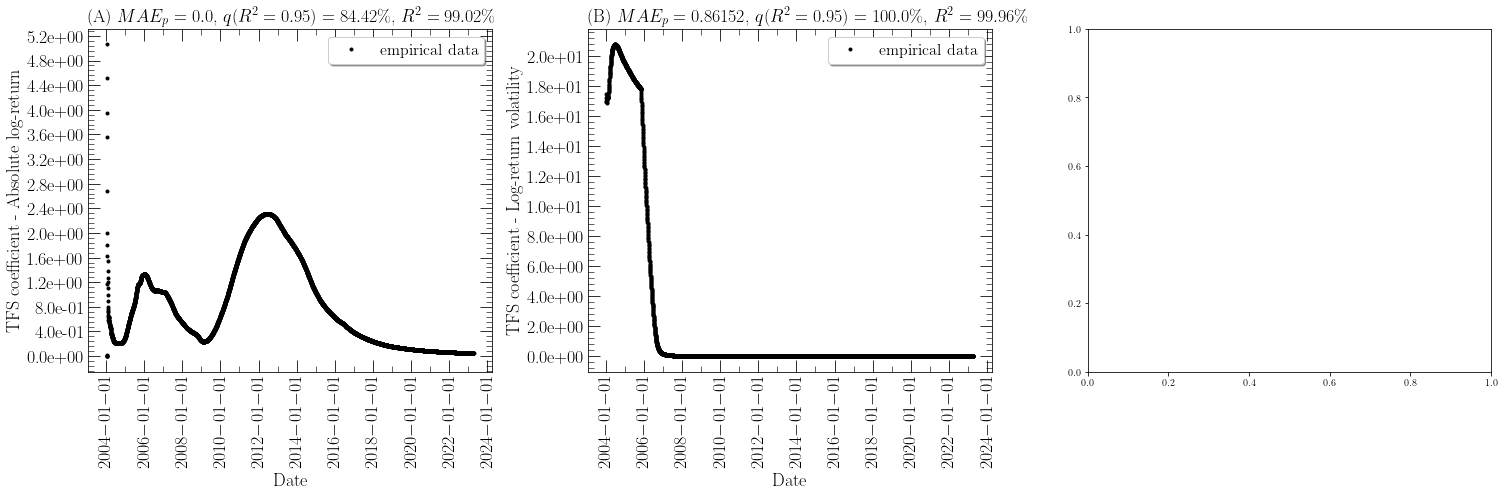

Generated plot for CHFUSD=X and time series absolute log-return
Generated plot for CHFUSD=X and time series log-return
Generated plot for CHFUSD=X and time series log-return volatility


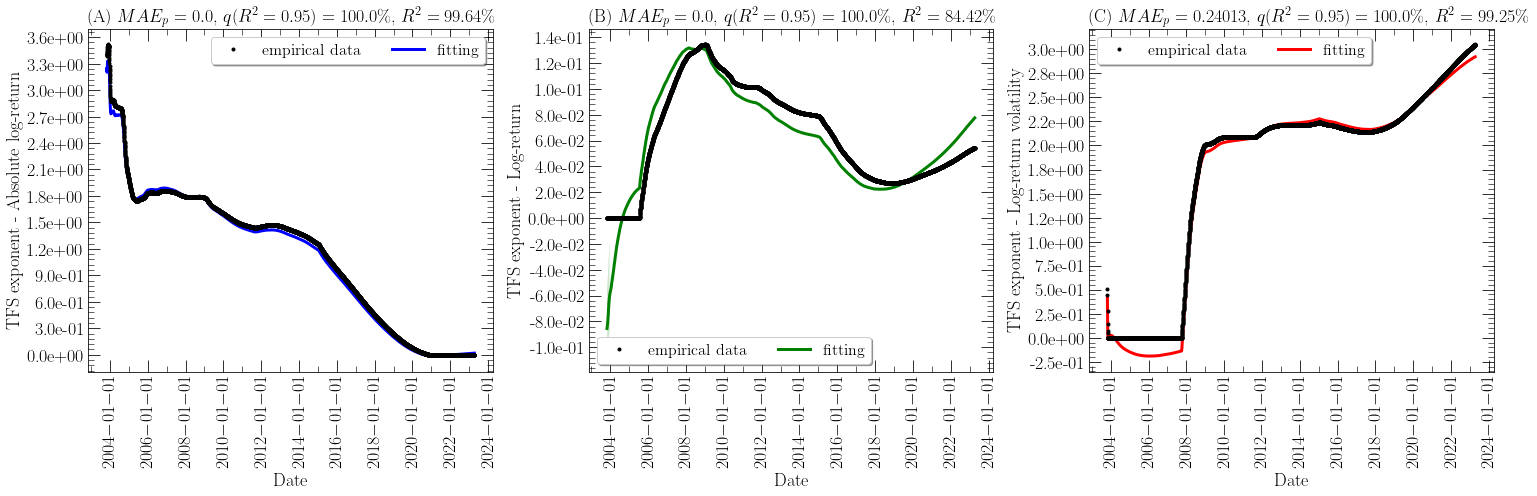

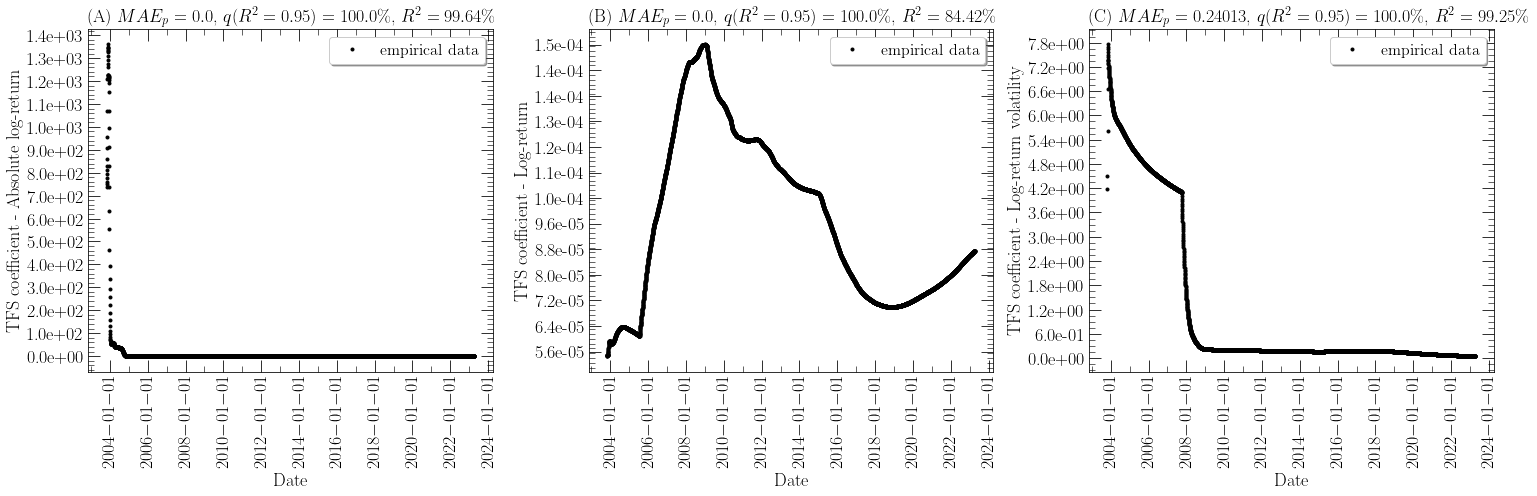

Generated plot for EURUSD=X and time series absolute log-return
Generated plot for EURUSD=X and time series log-return volatility


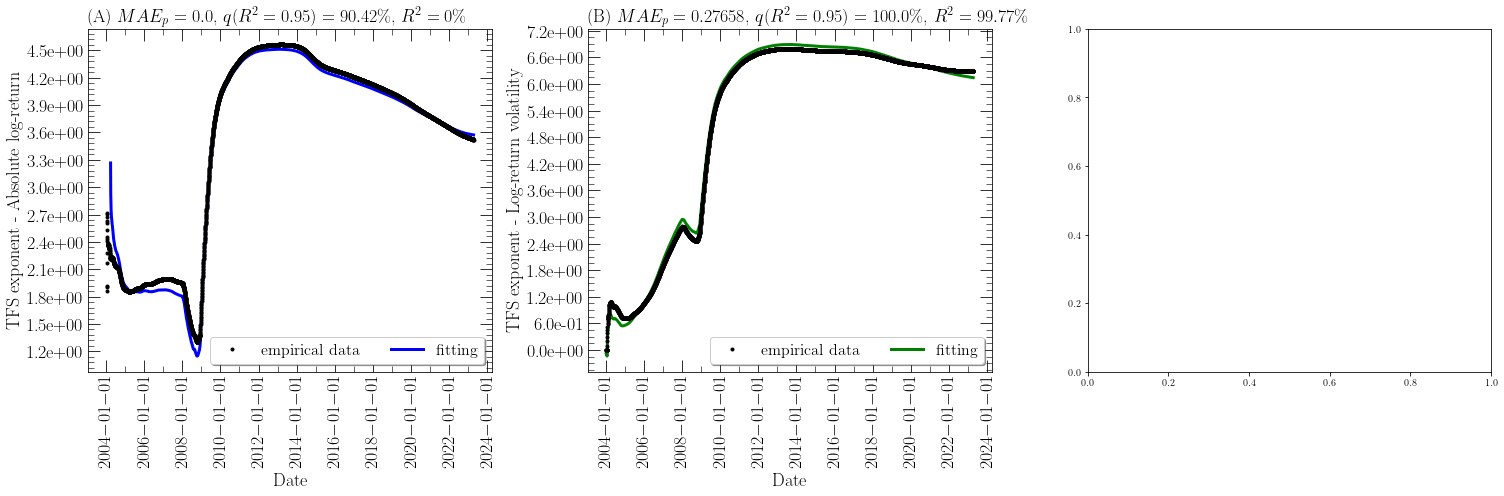

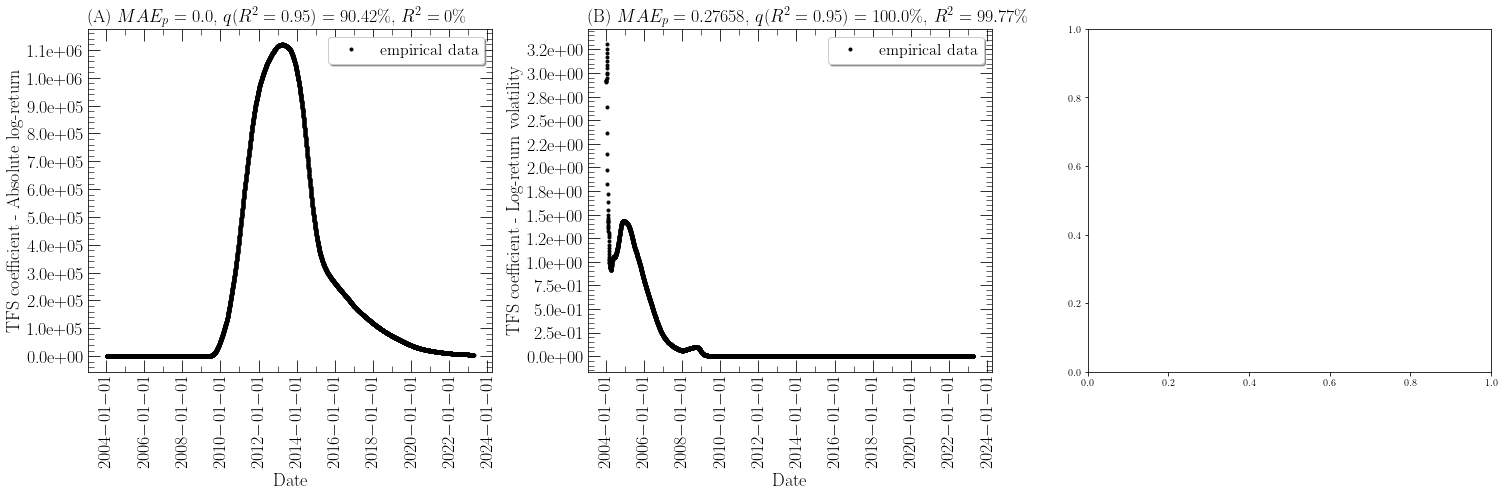

Generated plot for SGD=X and time series absolute log-return
Generated plot for SGD=X and time series log-return volatility


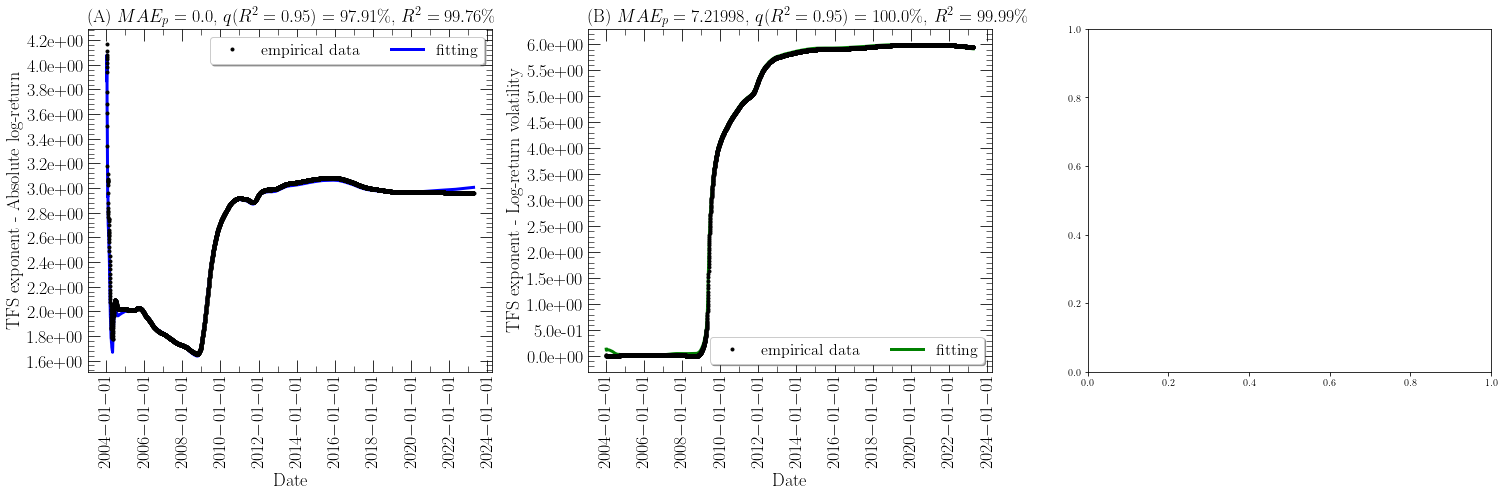

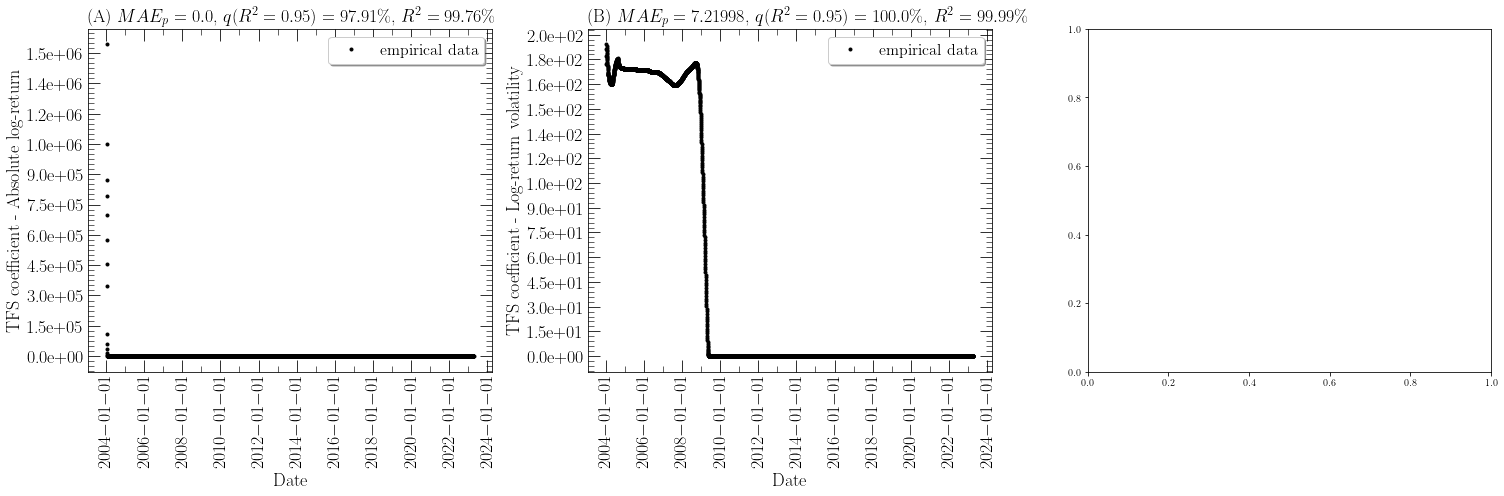

Generated plot for CAD=X and time series absolute log-return
Generated plot for CAD=X and time series log-return volatility


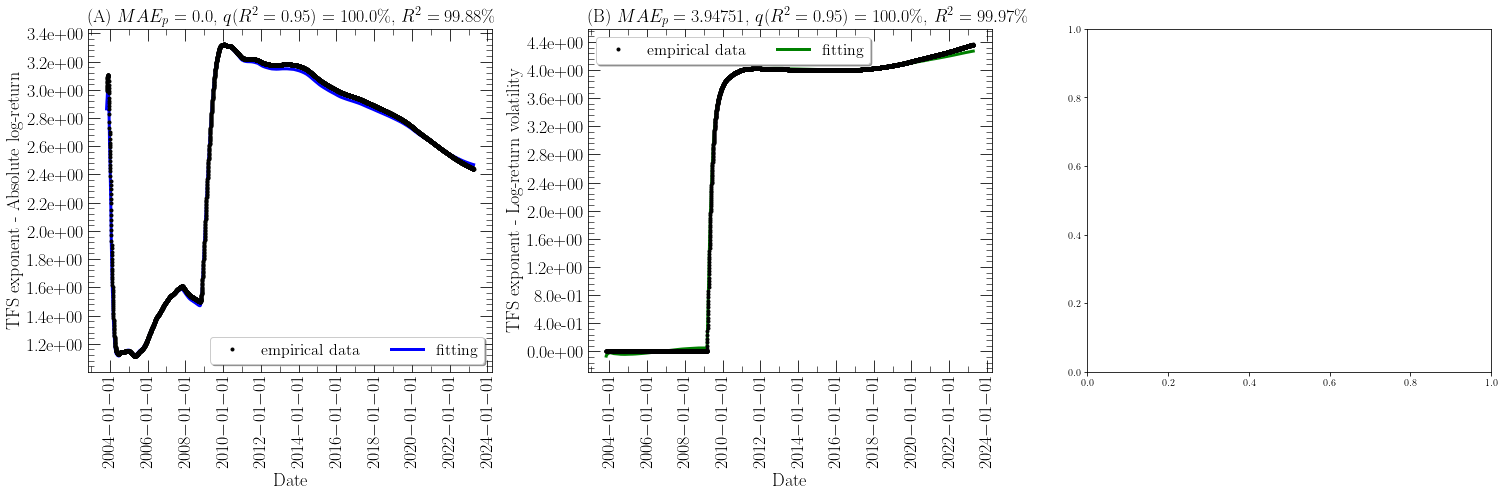

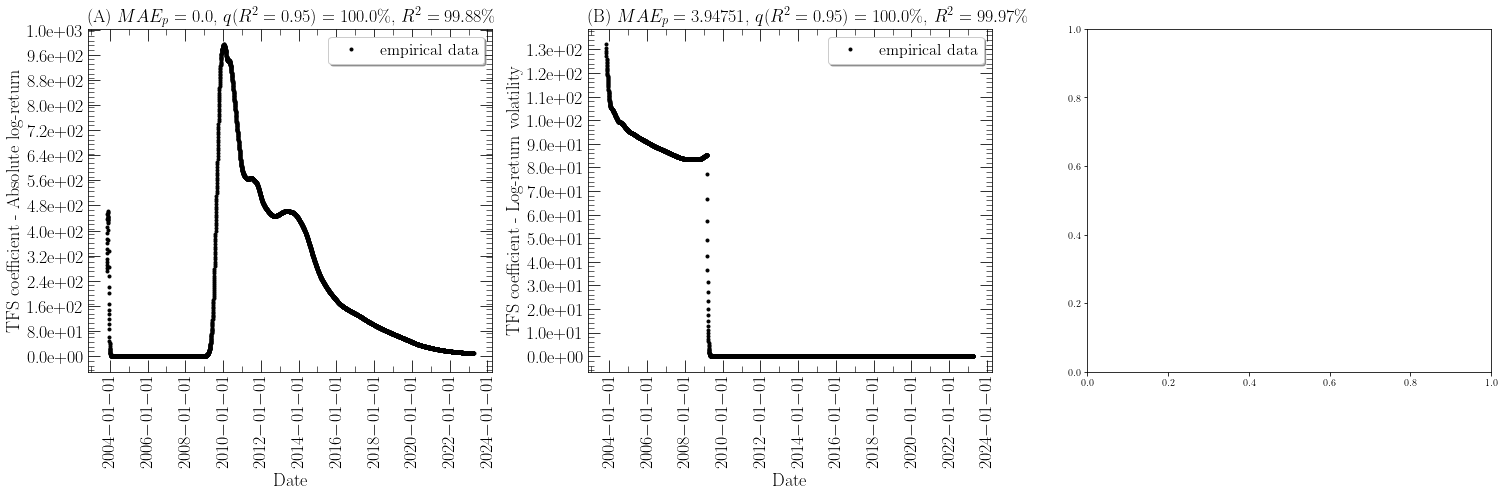

In [14]:
for ticker, ticker_name in list_currencies.items():
    if ticker not in ["BRL=X", "HKD=X"]:
        df_graph = plt_tfs.plot_tfs_evolution(
            df_fts = df_currencies,
            df_optimal = df_optimal_currencies,
            df_tfs = df_currencies_tfs_parameters,
            interval = "days",
            threshold = 0.95,
            symbols = [ticker],
            width = 21,
            height = 7,
            all_data = True,
            markersize = 3,
            fontsize_labels = 18,
            fontsize_legend = 16,
            usetex = True,
            n_cols = 4,
            n_x_breaks = 15,
            n_y_breaks = 15,
            fancy_legend = True,
            dpi = 300,
            save_figures = True,
            output_path = "{}/{}/currency".format(output_path, re.sub("-", "", input_generation_date)),
            information_name = re.sub("(\^)|(=X)", "", ticker),
            input_generation_date = input_generation_date
        )